# Part 02 BD-e2 Data Exploration Continued

This notebook is used to examine how the geospatial infomration can be used to predict observed biomass from the Global Ecosystem Dynamic Investigation Sensor (GEDI). This notebook will:

1. Open GEDI csv table
2. Examine Multicollinearity
3. Conduct Cluster Analysis

# Install Packages

Install python packages that we will need for data exploration and Machine Learning

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import silhouette_score, silhouette_samples

## Load Data
Load CSV from Data Preparation Part 01

In [2]:
### *********** 20241127 added Ownership*******************
outPathCSV = "D:/TO17/^^ExtraExtra/GEDI/HpmGuideMod/tables/GEDI_Kenobi_Prepared_Table_20250321.csv"
#Merged_Obiwan_pts_2022_2019_OutliersRemoved_MoransPositive_byYear
masterdf = pd.read_csv(outPathCSV)


In [3]:
masterdf

,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,HStF,...,NDPI,NDII,IPCA,GLI,ExBlue,ExGreen,ExRed,saturation,sinHue,cosHue
0,2019,0.890196,0,10,0,0,4758,-0.334307,200,0,...,4799.154334,4043.076923,1009.672,584.389048,2571.825507,-397.332592,545.151431,3510.781671,-0.618877,-0.785488
1,2019,0.733333,0,42,0,0,7151,-0.082763,679,0,...,6168.572824,4628.759398,1012.830,508.779829,2646.717557,-345.038168,410.992366,3811.953353,-0.594568,-0.804045
2,2019,0.568627,83,16,0,0,1507,0.297420,941,1,...,2173.545136,724.269377,975.958,1179.039301,2861.818182,-818.181818,732.121212,3595.988539,-0.720980,-0.692956
3,2019,0.580392,20,18,0,0,6336,0.193652,871,1,...,5684.548352,3890.944979,989.934,555.308752,2626.433313,-377.187689,467.712734,3700.217234,-0.606524,-0.795066
4,2019,0.654902,1,10,0,0,7014,-0.008698,1049,1,...,6209.604005,5130.111524,1121.041,529.709811,2804.001250,-359.487340,270.084401,4210.909091,-0.587200,-0.809442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17282,2022,0.549020,0,22,0,1,5720,0.099484,2203,0,...,7686.478768,5202.231520,922.242,347.284061,3471.471471,-234.234234,-539.339339,5962.500000,-0.536605,-0.843834
17283,2022,0.615686,0,3,0,1,5537,0.023195,765,0,...,7653.805875,5481.049563,902.457,171.325518,3374.848851,-114.873035,-577.992745,5926.395939,-0.518334,-0.855178
17284,2022,0.596078,0,1,0,1,5091,0.067455,767,0,...,7408.914075,5135.135135,892.917,213.903743,3350.089767,-143.626571,-520.646320,5833.333333,-0.523368,-0.852107
17285,2022,0.619608,0,8,0,1,5777,0.045287,850,0,...,7737.394825,5636.110143,894.590,115.555556,3305.175491,-77.334920,-550.862582,5831.234257,-0.512677,-0.858581


### Drop all ancillary Columns from Data
These are ancillary information and can't be used in model development

In [90]:
masterdfprepped = masterdf.dropna()# masterdfprepped #masterdf

masterdfprepped = masterdfprepped.drop(columns = [
    'GAP_StatusCode','Year',
    'Change_Raw_Probability_Fast_Loss',
    'Change_Raw_Probability_Gain',
    'Change_Raw_Probability_Slow_Loss',
    'value_contrast',
    'value_savg',
    'value_svar',
    'value_var', 
    'Morans',
    'Moran_noProtect',
    'Moran_someProtect',
    'Moran_fullProtect'])

masterdfprepped = masterdfprepped.drop(columns = [
    "ALOS_Chili_HeatLoad",
    'elevDiff_1',
    'IPCA',
    'glo30_elev_1',
    'Morans_NEW',
    'gediCH',
    'absElevDiffCH',
    'elevCheckCH',
    'Morans_ElevDiff',
    'beam',
    'elev_lowestmode',
    'rh100',
    'rh90',
    'rh95',
    'rh98',
    'beamType',
    'pwrMorans_Full',
    'pwrMorans_ElevDiff',
    'pwrElevDiffCheck',
    'pwrMoransRH98',
    'NDSI',
    'pwrMorans_Full_FINAL',
    'predRH98',
    'absRH98Diff',
    'RH98_check',
    'pwrMorans_Full_Final_RH98',
    #  'gnn',
    #  'NDSI',
    'elevCheck_v99',
    'absElevCheck_v99',
    'gediCanopyCover',
    'slopeCoverCheck',
    'lcms_Gain', 
    'lcms_SlowLoss', 
    'lcms_Stable',
    'lcms_fastLoss',
    'foldedAspect_NE_SW', 
    'foldedAspect_N_S',
    'NorthnessExposure',
    'EastnessExposure',
    'Land_Cover_Raw_Probability_Trees',
    'sinHue', 'cosHue',
    # 'value',
    'saturation',
    'spi', 'twi', 'roughness',
    'NDPI', 'NDII'
    #  'gnn',

                          
])


In [91]:
print("Column Count Before",len(masterdf.columns))
print("Column Count After", len(masterdfprepped.columns))

Column Count Before 129
Column Count After 69


### Split Data into X And Y datasets


In [92]:
Xdf00 = masterdfprepped.drop(columns = ['agbd'])
Xdf = masterdfprepped.drop(columns = ['agbd','uniqid','lon','lat','gnn','Ownership'])
ydf = masterdfprepped['agbd']                             

In [7]:
Xdf.columns

Index(['DouglasFir', 'EVI', 'FabDEM', 'HStF', 'NBR', 'NDMI', 'Other_Hardwood',
       'Red_Alder', 'Red_Cedar', 'SAVI', 'brightness', 'cosAspect', 'green',
       'greenness', 'nir', 'nonForestType', 'notHarvestable', 'red',
       'sinAspect', 'slope', 'swir1', 'swir2', 'tcAngleBG', 'tcAngleBW',
       'tcAngleGW', 'tcDistBG', 'tcDistBW', 'tcDistBW_asm',
       'tcDistBW_contrast', 'tcDistBW_corr', 'tcDistBW_dent', 'tcDistBW_dvar',
       'tcDistBW_ent', 'tcDistBW_idm', 'tcDistBW_imcorr1', 'tcDistBW_imcorr2',
       'tcDistBW_savg', 'tcDistBW_sent', 'tcDistBW_svar', 'tcDistBW_var',
       'tcDistGW', 'tpi11', 'tpi21', 'tpi41', 'wetness', 'EVI_asm',
       'EVI_contrast', 'EVI_corr', 'EVI_dent', 'EVI_dvar', 'EVI_ent',
       'EVI_idm', 'EVI_imcorr1', 'EVI_imcorr2', 'EVI_savg', 'EVI_sent',
       'EVI_svar', 'EVI_var', 'HeatLoadIndex', 'GLI', 'ExBlue', 'ExGreen',
       'ExRed'],
      dtype='object')

### Reconcile Multicolinearity
It;s typically good practise to remove any predictors that are highly correlated within one another. 
We will use 0.95% as the cut off and review texture related predictors

Text(0.5, 1.0, 'Multicollinearity Amongst Predictors')

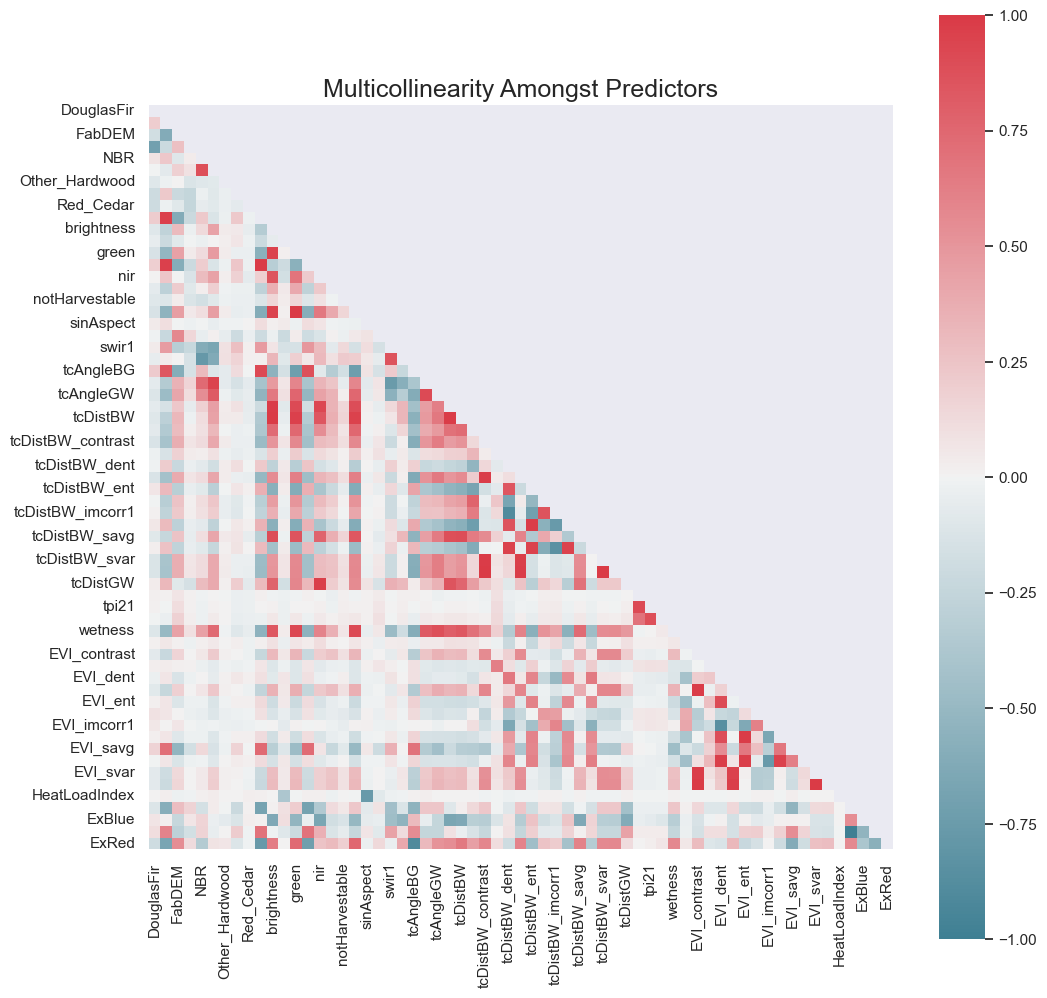

In [8]:
### Looking for MultiCollineararity
corr = Xdf.corr()
corr = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(12,12))

corrPlot = sns.heatmap(corr,
                      cmap = sns.diverging_palette(220,10,as_cmap=True),
                       vmin = -1, vmax=1,
                      square=True, ax=ax)
ax.grid()
plt.title("Multicollinearity Amongst Predictors", fontsize=18)

In [9]:
def corr_drop(x,cut = 0.95): #0.95
    indNames = x.columns
    corr_matrix = x.corr().abs()
    
    corr_score =[corr_matrix[variable].mean() for variable in indNames]
    corr_score = zip(corr_score,indNames)
    sorted_scores = sorted(corr_score,reverse=True)
    sorted_indNames = [element for _,element in sorted_scores]
    
    x = x[sorted_indNames]
    corr.matrix = x.corr().abs()
    
    upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
#     print(upper)
    
    to_drop = [column for column in upper.columns if any(upper[column] > cut)]
    return to_drop

print("done")

done


In [ ]:
texture = [ 'tcDistBW_asm',
 'tcDistBW_contrast',
 'tcDistBW_corr',
 'tcDistBW_dent',
 'tcDistBW_dvar',
 'tcDistBW_ent',
 'tcDistBW_idm',
 'tcDistBW_imcorr1',
 'tcDistBW_imcorr2',
 'tcDistBW_savg',
 'tcDistBW_sent',
 'tcDistBW_svar',
 'tcDistBW_var',
 'EVI_asm',
 'EVI_contrast', 
 'EVI_corr', 
 'EVI_dent', 
 'EVI_dvar', 
 'EVI_ent',
 'EVI_idm', 
 'EVI_imcorr1', 
 'EVI_imcorr2', 
 'EVI_savg', 
 'EVI_sent',
 'EVI_svar', 
 'EVI_var',
 
 ]

# spectral = [
#  'EVI',
#  'NBR',
#  'NDMI',
#  'SAVI',
#  'brightness',
#  'greenness',
#  'tcAngleBG',
#  'tcAngleBW',
#  'tcAngleGW',
#  'tcDistBG',
#  'tcDistBW',
#  'tcDistGW',
#  'wetness',
#  'NDPI',
#  'NDII',
#  'ExBlue',
#  'saturation',
#  'sinHue',
#  'cosHue']

# topo = [ 'tpi11',
#  'tpi21',
#  'tpi41',
#  'EastnessExposure',
#  'FabDEM',
#  'HStF',
#  'NorthnessExposure',
#  'cosAspect',
#  'foldedAspect_NE_SW',
#  'foldedAspect_N_S',
#  'sinAspect',
#  'slope'
#        ]
# texture = [ 'tcDistBW_asm',
#  'tcDistBW_contrast',
#  'tcDistBW_corr',
#  'tcDistBW_dent',
#  'tcDistBW_dvar',
#  'tcDistBW_ent',
#  'tcDistBW_idm',
#  'tcDistBW_imcorr1',
#  'tcDistBW_imcorr2',
#  'tcDistBW_savg',
#  'tcDistBW_sent',
#  'tcDistBW_svar',
#  'tcDistBW_var']




In [11]:
gedi_to_drop = corr_drop(Xdf[texture],cut = 0.95)
# print('Correlated Variables', gedi_to_drop)

print(len(gedi_to_drop))
list(gedi_to_drop)

11


['tcDistBW_contrast',
 'tcDistBW_dent',
 'tcDistBW_dvar',
 'tcDistBW_ent',
 'tcDistBW_svar',
 'EVI_contrast',
 'EVI_dent',
 'EVI_dvar',
 'EVI_ent',
 'EVI_imcorr2',
 'EVI_svar']

Text(0.5, 1.0, 'Multicollinearity Amongst Predictors')

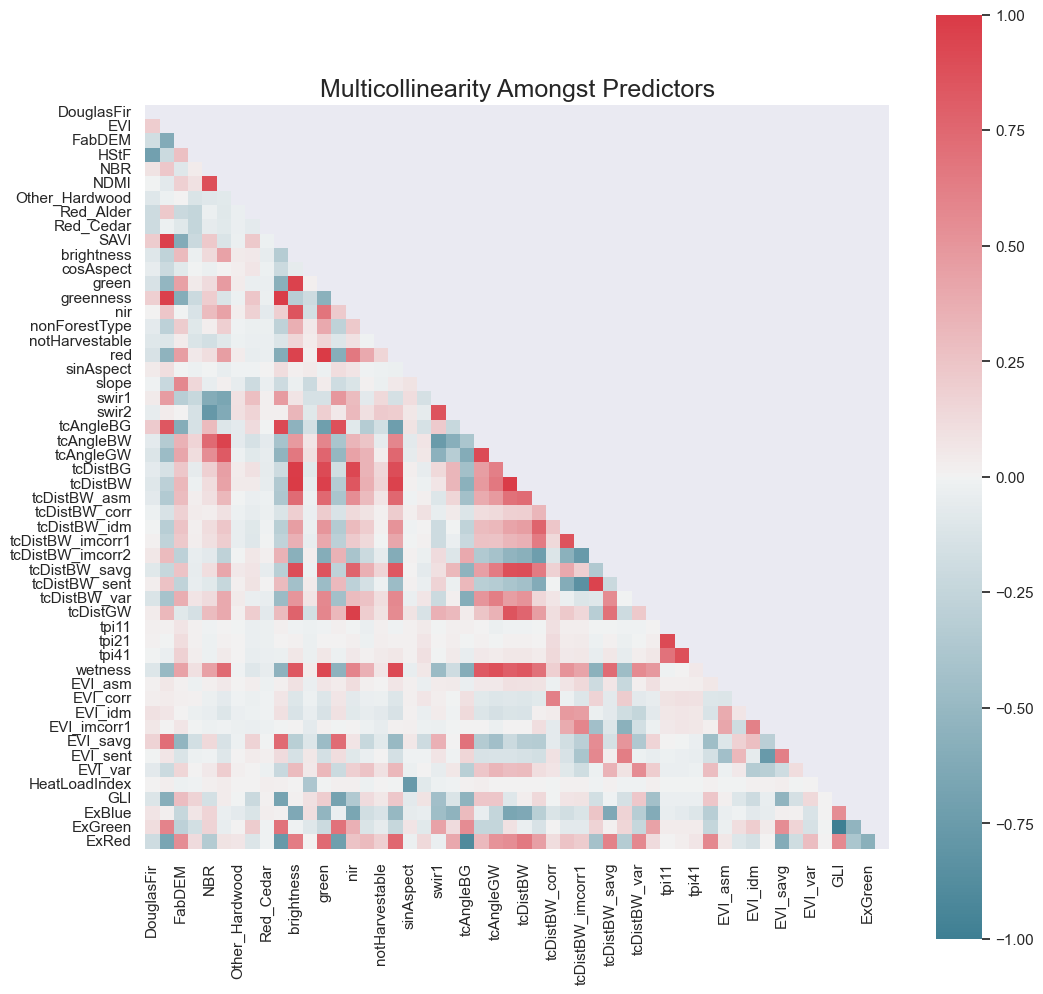

In [12]:
gedi_to_dropList = list(gedi_to_drop)

Xdf_no_corr = Xdf.drop(columns = gedi_to_dropList)
Xdf_no_corr

corr2 = Xdf_no_corr.corr()
corr2 = corr2.where(np.tril(np.ones(corr2.shape), k=-1).astype(bool))

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(12,12))

corrPlot2 = sns.heatmap(corr2,
                      cmap = sns.diverging_palette(220,10,as_cmap=True),
                        vmin = -1, vmax=1,
                      square=True, ax=ax)
ax.grid()
plt.title("Multicollinearity Amongst Predictors", fontsize=18)

In [13]:
list(Xdf_no_corr.columns)

['DouglasFir',
 'EVI',
 'FabDEM',
 'HStF',
 'NBR',
 'NDMI',
 'Other_Hardwood',
 'Red_Alder',
 'Red_Cedar',
 'SAVI',
 'brightness',
 'cosAspect',
 'green',
 'greenness',
 'nir',
 'nonForestType',
 'notHarvestable',
 'red',
 'sinAspect',
 'slope',
 'swir1',
 'swir2',
 'tcAngleBG',
 'tcAngleBW',
 'tcAngleGW',
 'tcDistBG',
 'tcDistBW',
 'tcDistBW_asm',
 'tcDistBW_corr',
 'tcDistBW_idm',
 'tcDistBW_imcorr1',
 'tcDistBW_imcorr2',
 'tcDistBW_savg',
 'tcDistBW_sent',
 'tcDistBW_var',
 'tcDistGW',
 'tpi11',
 'tpi21',
 'tpi41',
 'wetness',
 'EVI_asm',
 'EVI_corr',
 'EVI_idm',
 'EVI_imcorr1',
 'EVI_savg',
 'EVI_sent',
 'EVI_var',
 'HeatLoadIndex',
 'GLI',
 'ExBlue',
 'ExGreen',
 'ExRed']

In [14]:
len(Xdf_no_corr.columns)

52

### Partion Around Medoid (New)
Partioning around medoid (PAM) examines the data table row-wise and determines how well the records fall within to clusters. The goal is to remove observations where unique clusters can't be identified (sil Width >0.1)
https://medium.com/@nomannayeem/clustering-with-confidence-a-practical-guide-to-data-clustering-in-python-15d82d8a7bfb

#### Determine number of Clusters
First, we need to determine the optimal number of clusters to evaluate the data against. There are generally two appraoches: Elbow Method and Silhoette Method. 

The elbow method fits the kmedoids inertia

Silhoette Approach examines the average sil-width for eacch cluster with the intention of selecting the cluster with the highest sil width

In [93]:
## Prep Data
# Drop uniqueid and gnn
Xdf_Cluster = Xdf00.drop(columns = ['uniqid','gnn'])

#gedi_to_drop
Xdf_Cluster = Xdf_Cluster.drop(columns = gedi_to_dropList)

# Convert Ownerhsip to Classification to dummy variables
Xdf_Cluster = pd.get_dummies(Xdf_Cluster,columns=['Ownership'])

# Convert df to numpy array
Xdf_ClusterArray = Xdf_Cluster.to_numpy()

In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform
Xdf_ClusterArraySS = scaler.fit_transform(Xdf_ClusterArray)

In [120]:
len(Xdf_Cluster.columns)

64

#### Run PCA

In [144]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xdf_ClusterArraySS)

PCA()

In [145]:
pca.explained_variance_ratio_

array([0.221404, 0.112186, 0.071222, 0.066317, 0.045200, 0.037496,
       0.030488, 0.030124, 0.028888, 0.024973, 0.021361, 0.019600,
       0.019429, 0.017613, 0.016877, 0.016245, 0.015861, 0.015819,
       0.015662, 0.015613, 0.015446, 0.014844, 0.014677, 0.013017,
       0.012607, 0.010611, 0.010191, 0.008952, 0.007527, 0.006972,
       0.006541, 0.006231, 0.004767, 0.004664, 0.003519, 0.002904,
       0.002669, 0.002401, 0.001759, 0.001547, 0.001100, 0.000878,
       0.000691, 0.000609, 0.000539, 0.000472, 0.000456, 0.000290,
       0.000269, 0.000198, 0.000170, 0.000041, 0.000033, 0.000016,
       0.000007, 0.000004, 0.000003, 0.000001, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000])

Text(0, 0.5, 'Cumulative Explained Variance')

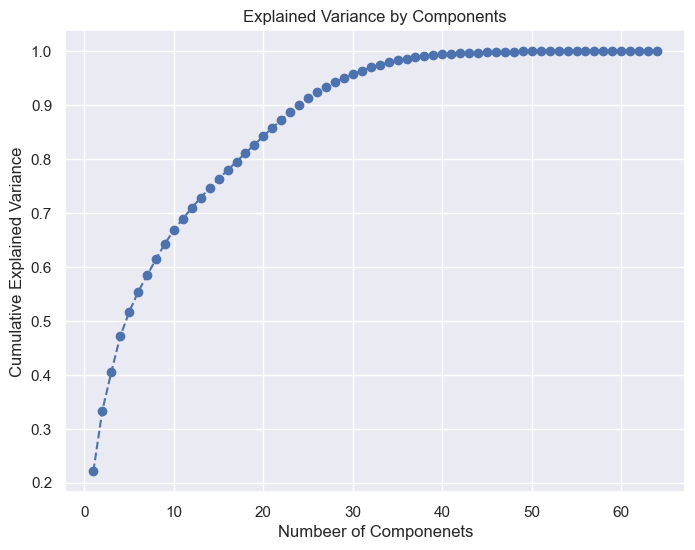

In [149]:
plt.plot(range(1,65),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Componenets')
plt.ylabel('Cumulative Explained Variance')

In [187]:
pca = PCA(n_components=18)
pca.fit(Xdf_ClusterArraySS)
pca.transform(Xdf_ClusterArraySS)

scores_pca = pca.transform(Xdf_ClusterArraySS)

Text(0, 0.5, 'Cumulative Explained Variance')

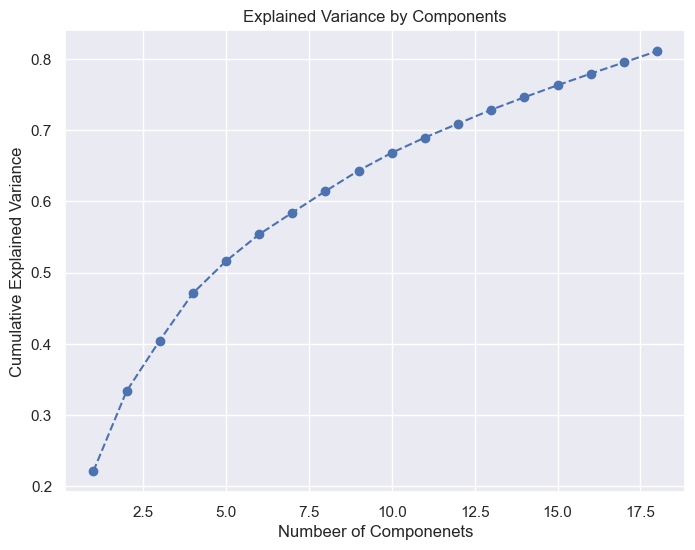

In [151]:
plt.plot(range(1,19),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Componenets')
plt.ylabel('Cumulative Explained Variance')

#### K-Medoids with PCA

In [155]:
def elbow_method(X, max_clusters=20):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmedoids = KMedoids(n_clusters=i, init='k-medoids++', max_iter=300, random_state=42)
        kmedoids.fit(X)
        wcss.append(kmedoids.inertia_)
    
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# elbow_method(Xdf_ClusterArray)

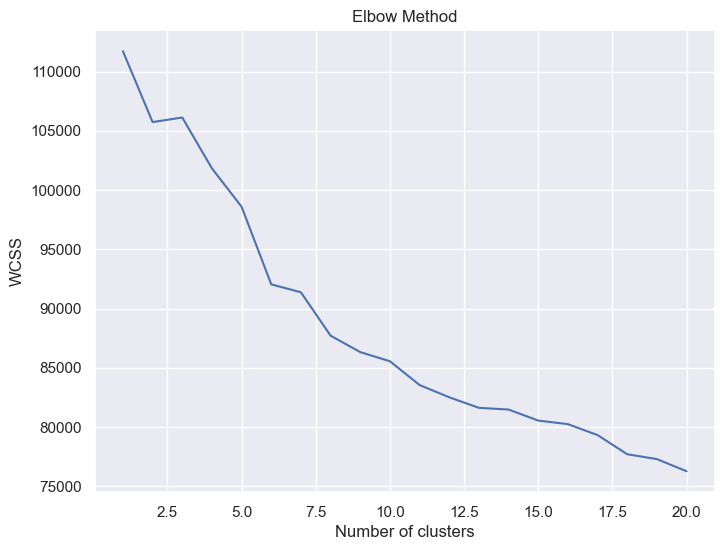

In [157]:
elbow_method(scores_pca,max_clusters=20)

In [153]:
def silhouette_analysis(X, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmedoids = KMedoids(n_clusters=i, init='k-medoids++', max_iter=300, random_state=42)
        labels = kmedoids.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    
    plt.plot(range(2, max_clusters + 1), silhouette_scores)
    plt.title('Silhouette Analysis')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

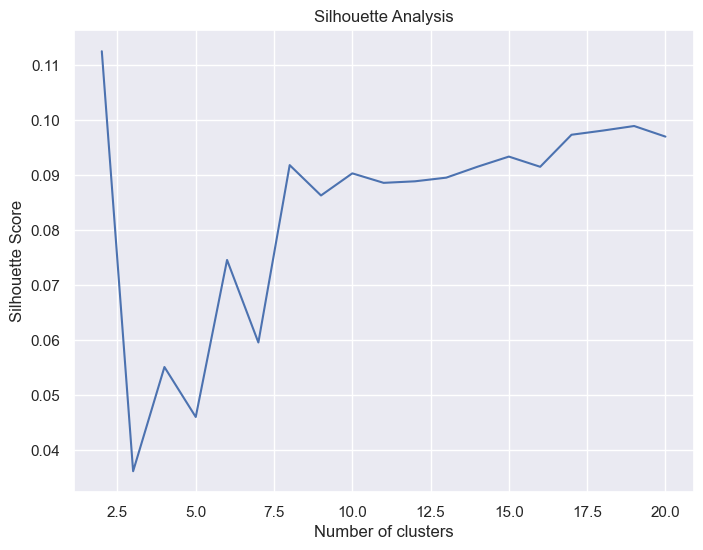

In [154]:
# 7 clusters is the best
silhouette_analysis(scores_pca,max_clusters=20)

### Run PAM

{0, 1, 2, 3, 4, 5}


Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

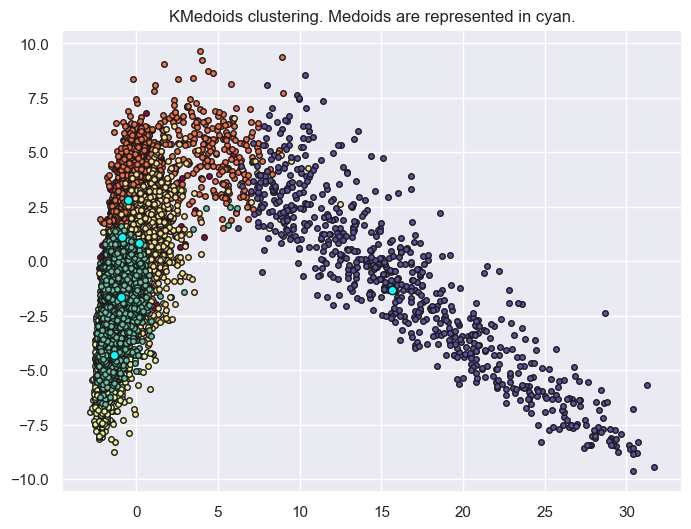

In [159]:
#############################################################################
# Compute Kmedoids clustering
dataTable = scores_pca #Xdf_pcaSS
numClusters = 6

cobj = KMedoids(n_clusters=numClusters, init='k-medoids++', max_iter=300, random_state=42).fit(dataTable) #Xdf_ClusterArraySS #Xdf_pcaSS
labels = cobj.labels_

# cobj = KMedoids(n_clusters=10).fit(Xdf_no_corr_Array)
# labels = kmedoids.fit_predict(Xdf_ClusterArray) #<-- Double check this!!!

unique_labels = set(labels)
print(unique_labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = dataTable[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=4,
    )

plt.plot(
    cobj.cluster_centers_[:, 0], #  
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

#### Calculate Sil Width

In [160]:
sil_score = silhouette_samples(scores_pca, cobj.labels_)
print(sil_score)

[0.016793 0.087333 0.055864 ... 0.165451 0.129936 0.159471]


In [184]:
pd.DataFrame(scores_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.053032,2.572886,3.481000,-1.584727,-0.053543,-0.462596,2.055387,-3.034935,-0.452601,-0.427130,0.513237,2.747795,-1.062638,2.200252,2.645640,0.088545,-1.038642,-0.562698
1,3.981694,0.321623,1.665566,10.283114,-4.420089,4.989250,-3.573371,1.424035,-0.941136,-2.930272,-0.009306,6.769659,-0.868106,-1.256959,-0.239014,-1.263416,1.903866,-0.751935
2,0.609121,4.893685,7.893561,1.960705,-1.599482,4.446894,0.170327,-2.276823,2.127464,-1.026102,1.294163,0.638410,-1.405150,-1.020683,0.097566,-0.363204,0.178729,-0.924292
3,1.616389,0.935022,3.080166,2.692615,-3.565715,3.664971,-2.498752,-0.423578,1.507484,-1.087516,0.114526,0.704435,-1.823023,-1.341978,0.096635,-0.104279,0.062196,-0.746046
4,3.947165,1.806031,0.436843,9.411380,-3.940792,4.139552,-3.454408,1.524400,0.667140,-3.609436,0.486552,5.880475,-1.401481,-0.872477,-1.150795,-0.376485,0.525952,-0.587501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17245,-1.471594,1.793707,-0.825774,-2.365963,-2.439891,0.692313,2.471302,0.418857,-0.808822,-0.496274,1.146010,0.867935,-0.331287,0.017990,-1.059511,-0.057535,0.648941,-0.181088
17246,-0.890185,1.378104,-0.634742,1.030691,-1.760783,1.108738,3.168371,1.095708,-1.138503,2.379811,-1.387930,0.528046,0.369486,-1.106620,-0.567009,0.199925,0.090451,0.081128
17247,-0.885234,1.762055,-0.143525,1.039316,-1.835312,1.029965,3.403017,1.673345,-0.347809,2.247352,-1.248101,0.502652,0.386764,-1.036315,-0.583675,0.199440,0.097442,0.053646
17248,-1.086238,1.006842,-1.031386,-0.153723,-1.075306,2.185499,1.575462,1.217701,0.235536,1.499630,0.684508,-0.576158,-0.775928,-1.431254,0.545768,0.279134,-0.015486,-0.441668


In [224]:
newList = []
for i in range(1,19):
    if i<10:
        name = f'Comp0{i}'
    else:
        name = f'Comp{i}'
    newList.append(name)

df_segm_pca_kmedoids = pd.concat([masterdfprepped.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmedoids.columns.values[-18:] = newList
df_segm_pca_kmedoids['clusterLabel'] = cobj.labels_
df_segm_pca_kmedoids['silWidth'] = sil_score

df_segm_pca_kmedoids['clusterLabelStr'] = df_segm_pca_kmedoids['clusterLabel'].map({0:'first',
                                                                                       1:'second',
                                                                                       2:'third',
                                                                                       3:'fourth',
                                                                                       4:'fifth',
                                                                                       5:'sixth'})


#### Visualize

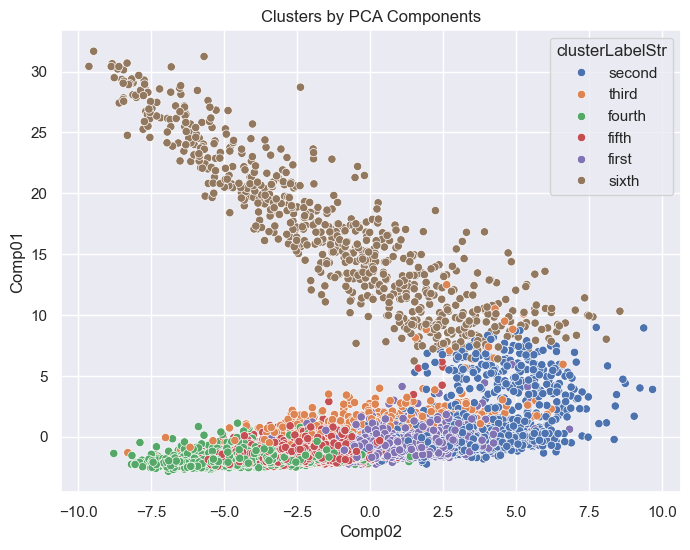

In [225]:
sns.scatterplot(data=df_segm_pca_kmedoids,x = 'Comp02',y='Comp01', hue='clusterLabelStr')
plt.title('Clusters by PCA Components')
plt.show()

#### Subset by SilWidth

count    17250.000000
mean         0.074582
std          0.080900
min         -0.205782
25%          0.023393
50%          0.068626
75%          0.114764
max          0.481214
Name: silWidth, dtype: float64

# of Obs less than 0: 2589
# of Obs less than 0.1: 11681


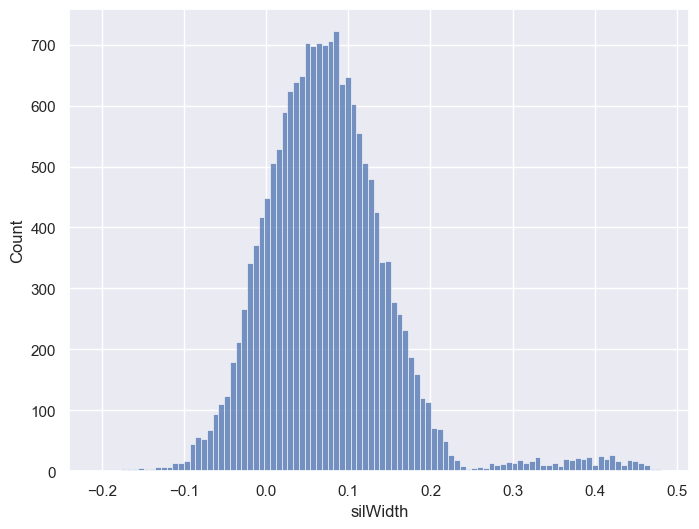

In [231]:
sns.histplot(df_segm_pca_kmedoids['silWidth'])
print(df_segm_pca_kmedoids['silWidth'].describe())
print("\n# of Obs less than 0:", len(df_segm_pca_kmedoids[(df_segm_pca_kmedoids['silWidth']<0)]))
print("# of Obs less than 0.1:", len(df_segm_pca_kmedoids[(df_segm_pca_kmedoids['silWidth']<0.1)]))

#### Drop Correlatied Variables from masterdf

In [240]:
masterdfpreppedPAM03 = df_segm_pca_kmedoids.drop(columns=gedi_to_drop)
masterdfpreppedPAM03 = masterdfpreppedPAM03.drop(columns=newList)
masterdfpreppedPAM03

,silWidth,clusterLabel,DouglasFir,EVI,FabDEM,HStF,NBR,NDMI,Other_Hardwood,Red_Alder,...,EVI_sent,EVI_var,HeatLoadIndex,Ownership,gnn,GLI,ExBlue,ExGreen,ExRed,clusterLabelStr
0,0.016793,1,0,4758,200,0,5849,4039,0,0,...,30905,420,10896,Federal_Govt,Red_Cedar,584.389048,2571.825507,-397.332592,545.151431,second
1,0.087333,2,0,7151,679,0,6782,4627,0,1,...,1450,16,8828,State_Govt,Red_Alder,508.779829,2646.717557,-345.038168,410.992366,third
2,0.055864,1,0,1507,941,1,2799,722,0,0,...,21471,242,8936,Industry,HStF,1179.039301,2861.818182,-818.181818,732.121212,second
3,-0.017801,1,0,6336,871,1,6230,3888,0,0,...,17428,277,8466,Industry,HStF,555.308752,2626.433313,-377.187689,467.712734,second
4,0.093408,2,0,7014,1049,1,7007,5128,0,0,...,2323,7,7598,State_Govt,HStF,529.709811,2804.001250,-359.487340,270.084401,third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17245,0.109556,0,1,5720,2203,0,8034,5201,0,0,...,30438,365,9037,State_Govt,DouglasFir,347.284061,3471.471471,-234.234234,-539.339339,first
17246,0.185058,0,1,5537,765,0,8019,5477,0,0,...,28053,43,8852,Private,DouglasFir,171.325518,3374.848851,-114.873035,-577.992745,first
17247,0.165451,0,1,5091,767,0,7792,5134,0,0,...,28177,43,8618,Private,DouglasFir,213.903743,3350.089767,-143.626571,-520.646320,first
17248,0.129936,0,1,5777,850,0,8141,5632,0,0,...,25876,96,8526,Industry,DouglasFir,115.555556,3305.175491,-77.334920,-550.862582,first


### Save Prepared Data Table

In [241]:
outDir = "D:/TO17/^^ExtraExtra/GEDI/HpmGuideMod/tables"
outName = "GEDI_Kenobi_Prepared_Table_mlReady_20250326.csv"
outPath = os.path.join(outDir,outName)

masterdfpreppedPAM03.to_csv(outPath,index=False, encoding='utf-8-sig')

### Done with Data Prepartation Part 02
Move to Script XX to Part 03: Machine Learning